In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/booking-com-hotel-reviews/booking_reviews copy.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
 df = pd.read_csv('/kaggle/input/booking-com-hotel-reviews/booking_reviews copy.csv')

In [6]:
df.head()

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [7]:
print("Dataset Shape:", df.shape)

Dataset Shape: (26675, 16)


In [8]:
columns_to_drop = ['index', 'crawled_at', 'url', 'hotel_url', 'images', 'meta']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,tags
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...
...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Double Room~Stayed 1...


In [10]:
print(df.isnull().sum())

review_title         1
reviewed_at        105
reviewed_by        105
hotel_name         289
avg_rating         289
nationality        305
rating             289
review_text        289
raw_review_text    473
tags               473
dtype: int64


In [11]:
print(df.dtypes)

review_title        object
reviewed_at         object
reviewed_by         object
hotel_name          object
avg_rating         float64
nationality         object
rating             float64
review_text         object
raw_review_text     object
tags                object
dtype: object


In [12]:
df.dropna(inplace=True)

In [13]:
print(df.isnull().sum())

review_title       0
reviewed_at        0
reviewed_by        0
hotel_name         0
avg_rating         0
nationality        0
rating             0
review_text        0
raw_review_text    0
tags               0
dtype: int64


In [14]:
print("Dataset Shape:", df.shape)

Dataset Shape: (26185, 10)


In [15]:
print(df['tags'].head())  # This will print the first 5 values in the 'tags' column


0    Business trip~Solo traveller~Junior Suite~Stay...
1    Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...
2    Leisure trip~Couple~Apartment with Sea View~St...
3    Business trip~Solo traveller~Junior Suite~Stay...
4    Leisure trip~People with friends~Apartment wit...
Name: tags, dtype: object


In [16]:
df['trip_type'] = df['tags'].str.extract(r'^(Business trip|Leisure trip)')  # Only Business or Leisure trip for trip_type
df['traveller_type'] = df['tags'].str.extract(r'~(Couple|Solo traveller|Group|People with friends|Family with young children|With a pet)')  # Only traveller types
df['room_type'] = df['tags'].str.extract(r'~[^~]+~([^~]+)')  # For room_type, this is fine
df['stay_duration'] = df['tags'].str.extract(r'~[^~]+~[^~]+~([^~]+)')  # For stay_duration, this is also fine
# View the updated DataFrame
print(df[['tags', 'trip_type', 'traveller_type', 'room_type', 'stay_duration']].head())


                                                tags      trip_type  \
0  Business trip~Solo traveller~Junior Suite~Stay...  Business trip   
1  Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...   Leisure trip   
2  Leisure trip~Couple~Apartment with Sea View~St...   Leisure trip   
3  Business trip~Solo traveller~Junior Suite~Stay...  Business trip   
4  Leisure trip~People with friends~Apartment wit...   Leisure trip   

        traveller_type                room_type    stay_duration  
0       Solo traveller             Junior Suite   Stayed 1 night  
1               Couple             Deluxe Suite   Stayed 1 night  
2               Couple  Apartment with Sea View  Stayed 6 nights  
3       Solo traveller             Junior Suite  Stayed 4 nights  
4  People with friends  Apartment with Sea View  Stayed 4 nights  


In [17]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,tags,trip_type,traveller_type,room_type,stay_duration
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,Business trip,Solo traveller,Junior Suite,Stayed 1 night
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,Leisure trip,Couple,Deluxe Suite,Stayed 1 night
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,Leisure trip,Couple,Apartment with Sea View,Stayed 6 nights
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,Business trip,Solo traveller,Junior Suite,Stayed 4 nights
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,Leisure trip,People with friends,Apartment with Sea View,Stayed 4 nights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...,Business trip,Solo traveller,Double or Twin Room,Stayed 3 nights
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...,Leisure trip,Family with young children,Tent,Stayed 3 nights
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...,Leisure trip,Couple,Standard Double or Twin Room,Stayed 2 nights
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Double Room~Stayed 1...,Leisure trip,Couple,Basic Double Room,Stayed 1 night


In [18]:
print(df.isnull().sum())

review_title         0
reviewed_at          0
reviewed_by          0
hotel_name           0
avg_rating           0
nationality          0
rating               0
review_text          0
raw_review_text      0
tags                 0
trip_type          989
traveller_type     860
room_type            0
stay_duration      129
dtype: int64


In [19]:
df.dropna(inplace=True)

In [20]:
print(df.isnull().sum())

review_title       0
reviewed_at        0
reviewed_by        0
hotel_name         0
avg_rating         0
nationality        0
rating             0
review_text        0
raw_review_text    0
tags               0
trip_type          0
traveller_type     0
room_type          0
stay_duration      0
dtype: int64


In [21]:
df.shape

(25196, 14)

In [22]:
# Extract numbers from 'stay_duration' and handle NaN values
df['stay_duration'] = df['stay_duration'].str.extract(r'(\d+)')  # Extract numbers
df['stay_duration'] = df['stay_duration'].fillna(0).astype(int)  # Replace NaN with 0 and convert to int


In [23]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,tags,trip_type,traveller_type,room_type,stay_duration
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,Business trip,Solo traveller,Junior Suite,1
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,Leisure trip,Couple,Deluxe Suite,1
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,Leisure trip,Couple,Apartment with Sea View,6
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,Business trip,Solo traveller,Junior Suite,4
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,Leisure trip,People with friends,Apartment with Sea View,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip~Solo traveller~Double or Twin Ro...,Business trip,Solo traveller,Double or Twin Room,3
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Family with young children~Tent~S...,Leisure trip,Family with young children,Tent,3
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Standard Double or Twin Ro...,Leisure trip,Couple,Standard Double or Twin Room,2
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip~Couple~Basic Double Room~Stayed 1...,Leisure trip,Couple,Basic Double Room,1


In [24]:
# Drop the 'tags' column in place
df.drop(columns=['tags'], inplace=True)


In [25]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,trip_type,traveller_type,room_type,stay_duration
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip,Solo traveller,Junior Suite,1
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip,Couple,Deluxe Suite,1
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Couple,Apartment with Sea View,6
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip,Solo traveller,Junior Suite,4
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,People with friends,Apartment with Sea View,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip,Solo traveller,Double or Twin Room,3
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Family with young children,Tent,3
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Couple,Standard Double or Twin Room,2
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip,Couple,Basic Double Room,1


In [26]:
print(df['raw_review_text'].head())

0    <p class="review_pos "><svg aria-label="Positi...
1    <p class="review_pos "><svg aria-label="Positi...
2    <p class="review_neg "><svg aria-label="Negati...
3    <p class="review_pos "><svg aria-label="Positi...
4    <p class="review_neg "><svg aria-label="Negati...
Name: raw_review_text, dtype: object


In [27]:
from bs4 import BeautifulSoup

In [28]:
def classify_review(html_text):
    soup = BeautifulSoup(html_text, "html.parser")
    review_class = soup.p["class"][0]  
    return "positive" if review_class == "review_pos" else "negative"

df["review_sentiment"] = df["raw_review_text"].apply(classify_review)

print(df.head())

                                        review_title       reviewed_at  \
0                                        Exceptional      11 July 2021   
1  I highly recommend this b&b! We enjoyed it a lot!  24 November 2019   
2                                        Exceptional    3 January 2020   
3  My stay in the house was a experiencing bliss ...  8 September 2019   
4  One bedroom apartment with wonderful view and ...      23 June 2019   

  reviewed_by              hotel_name  avg_rating     nationality  rating  \
0      Kyrylo         Villa Pura Vida         9.7          Poland    10.0   
1     Dimitri         Villa Pura Vida         9.7         Belgium     9.0   
2    Virginia  Hydro Palace Apartment         9.2  United Kingdom    10.0   
3      Kannan         Villa Pura Vida         9.7     Netherlands    10.0   
4         Sue  Hydro Palace Apartment         9.2    South Africa     9.2   

                                         review_text  \
0  Everything was perfect! Quite, co

In [29]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,raw_review_text,trip_type,traveller_type,room_type,stay_duration,review_sentiment
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip,Solo traveller,Junior Suite,1,positive
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip,Couple,Deluxe Suite,1,positive
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Couple,Apartment with Sea View,6,negative
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip,Solo traveller,Junior Suite,4,positive
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,People with friends,Apartment with Sea View,4,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...","<p class=""review_neg ""><svg aria-label=""Negati...",Business trip,Solo traveller,Double or Twin Room,3,negative
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...","<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Family with young children,Tent,3,negative
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip,Couple,Standard Double or Twin Room,2,negative
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,"<p class=""review_none""><em>There are no commen...",Leisure trip,Couple,Basic Double Room,1,negative


In [30]:
df.drop(columns=['raw_review_text'], inplace=True)

In [31]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,trip_type,traveller_type,room_type,stay_duration,review_sentiment
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip,Solo traveller,Junior Suite,1,positive
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip,Couple,Deluxe Suite,1,positive
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip,Couple,Apartment with Sea View,6,negative
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip,Solo traveller,Junior Suite,4,positive
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip,People with friends,Apartment with Sea View,4,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...",Business trip,Solo traveller,Double or Twin Room,3,negative
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip,Family with young children,Tent,3,negative
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip,Couple,Standard Double or Twin Room,2,negative
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,Leisure trip,Couple,Basic Double Room,1,negative


In [32]:
print(df.nunique())


review_title         8341
reviewed_at          1053
reviewed_by          8095
hotel_name            819
avg_rating             42
nationality           160
rating                 35
review_text         17647
trip_type               2
traveller_type          5
room_type             632
stay_duration          27
review_sentiment        2
dtype: int64


In [33]:
print(df['trip_type'].unique())

['Business trip' 'Leisure trip']


In [34]:
print(df['traveller_type'].unique())

['Solo traveller' 'Couple' 'People with friends'
 'Family with young children' 'Group']


In [35]:
print(df['stay_duration'].unique())

[ 1  6  4  7  3  2  5  8 26 19 11 30  9 25 10 21 14 12 16 17 13 28 20 22
 27 15 18]


A higher sentiment score indicates a better review (positive sentiment).
A lower sentiment score indicates a worse review (negative sentiment).

In [36]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,trip_type,traveller_type,room_type,stay_duration,review_sentiment
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...",Business trip,Solo traveller,Junior Suite,1,positive
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,Leisure trip,Couple,Deluxe Suite,1,positive
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,Leisure trip,Couple,Apartment with Sea View,6,negative
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,Business trip,Solo traveller,Junior Suite,4,positive
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,The building itself has a very musty smell in ...,Leisure trip,People with friends,Apartment with Sea View,4,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,3 July 2019,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,"Had a room with the view to the main street, j...",Business trip,Solo traveller,Double or Twin Room,3,negative
26671,Exceptional,7 December 2018,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,"There was nothing not to like. ,\n\nEverything...",Leisure trip,Family with young children,Tent,3,negative
26672,Good,15 September 2018,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,Poor internet connection and aircon in room no...,Leisure trip,Couple,Standard Double or Twin Room,2,negative
26673,Very good,2 August 2019,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,There are no comments available for this review,Leisure trip,Couple,Basic Double Room,1,negative


In [37]:
positive_reviews = df[df['review_sentiment'] == 'positive']['review_text'].tolist()
negative_reviews = df[df['review_sentiment'] == 'negative']['review_text'].tolist()


In [38]:
positive_reviews[0:10]

['Everything was perfect! Quite, cozy place to relax.',
 'Very friendly host and perfect breakfast!',
 'My stay in the house was a experiencing bliss in luxury. The house is sheer touch of beauty wrapped by luxury and complimented with kindness and care  from Lisbette & her parents making it a most remarkable stay.',
 'Spacious, more than enough rooms, a lot of bath rooms. For electric car drivers, free charging at the Lidl in Givet, only 10 kms, 50 KW.',
 'Romantic room just around the corner from the train station.  Nice and different setting from most rooms with cute details. Excellent internet connection and Netflix available.',
 'The B&B is located just next to Place Jourdan, so there are various options for dinner in the evening. The family is super nice and helpful and the breakfast is prepared in advance so everything is super COVID-safe!',
 'Amazing beautiful place! I would definitely recommend this place:)',
 'Excellent breakfast\rVery professional staff, ready to help to get

In [39]:
negative_reviews[0:10]

['It was just what we wanted for a week by the beach in winter,\n\nLocation was fab, apartment quiet and very well-equipped. Spotless clean.',
 'The building itself has a very musty smell in the hallway (despite being built in 1988), but the apartment itself smells good, which makes it bearable. \nWhen showering, the hot water goes off every 2-3 minutes for about 20-30 seconds and then only cold water comes out. The hot water then comes back again. This should be checked out. That is the only thing we didn’t like about the apartment. ,\n\nThe view was great, the apartment furnished in a modern style and equipped with everything you may need. The apartment was clean. \nThere is free, secure parking outside in the building’s parking lot or downstairs in the garage. \nJan always responded promptly to all messages sent via Booking.com messenger.',
 'Nothing,\n\nBeautiful home! Great room, most comfortable bed! The hostess couldn’t do enough for you.  Very gracious and welcoming, even gave 

In [40]:

!pip install contractions
!pip install textblob
!pip install nltk

import pandas as pd
import contractions
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

# Download necessary NLTK data
nltk.download('vader_lexicon')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:

def expand_contractions(text):
    return contractions.fix(text)

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Strip leading/trailing spaces
    text = text.strip()
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters except spaces and basic punctuation
    text = re.sub(r'[^\w\s!?]', '', text)
    return text



In [42]:

df['review_text'] = df['review_text'].apply(expand_contractions)
df['review_text'] = df['review_text'].apply(clean_text)


In [43]:
from textblob import TextBlob

# Function to classify sentiment
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0.2:
        return 'positive'
    elif blob.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment analysis
df['sentiment'] = df['review_text'].apply(get_textblob_sentiment)
print(df.head())


                                        review_title       reviewed_at  \
0                                        Exceptional      11 July 2021   
1  I highly recommend this b&b! We enjoyed it a lot!  24 November 2019   
2                                        Exceptional    3 January 2020   
3  My stay in the house was a experiencing bliss ...  8 September 2019   
4  One bedroom apartment with wonderful view and ...      23 June 2019   

  reviewed_by              hotel_name  avg_rating     nationality  rating  \
0      Kyrylo         Villa Pura Vida         9.7          Poland    10.0   
1     Dimitri         Villa Pura Vida         9.7         Belgium     9.0   
2    Virginia  Hydro Palace Apartment         9.2  United Kingdom    10.0   
3      Kannan         Villa Pura Vida         9.7     Netherlands    10.0   
4         Sue  Hydro Palace Apartment         9.2    South Africa     9.2   

                                         review_text      trip_type  \
0  everything was per

In [44]:
positive_reviews = df[df['sentiment'] == 'positive']['review_text'].tolist()
negative_reviews = df[df['sentiment'] == 'negative']['review_text'].tolist()
neutral_reviews = df[df['sentiment'] == 'neutral']['review_text'].tolist()

In [45]:
positive_reviews[0:10]

['everything was perfect! quite cozy place to relax',
 'very friendly host and perfect breakfast!',
 'my stay in the house was a experiencing bliss in luxury the house is sheer touch of beauty wrapped by luxury and complimented with kindness and care  from lisbette  her parents making it a most remarkable stay',
 'the building itself has a very musty smell in the hallway despite being built in 1988 but the apartment itself smells good which makes it bearable \nwhen showering the hot water goes off every 23 minutes for about 2030 seconds and then only cold water comes out the hot water then comes back again this should be checked out that is the only thing we did not like about the apartment \n\nthe view was great the apartment furnished in a modern style and equipped with everything you may need the apartment was clean \nthere is free secure parking outside in the buildings parking lot or downstairs in the garage \njan always responded promptly to all messages sent via bookingcom messe

In [46]:
negative_reviews[0:10]

['the stains on the floor in the room because of other customers  \n\neverything',
 'the wifi is very bad \n\nit was very clean',
 'we knew there was no breakfast but they could have made a little effort providing a kettle and two cups for some instant coffee in the morning they changed the sheets only once in the week towels were changed every day but some were really old and thin plastic glasses were provided only twice the shower floor was terribly slippery and slopy pillows were awful my neck is still complaining and last but not least we had to pay as we arrived in advance the very first evening\n\nthe wifi conexión and the airco',
 'as a frequent traveler it was by far the worst experience i have ever had with bookingcom the room was cold in late december and although my booking included heater the owner refused to turn it on and told me i could change my reservation if i was cold! she also tried to stopped me to use the bathroom on my checkout saying that she had already cleaned

In [47]:
neutral_reviews[0:10]

['it was just what we wanted for a week by the beach in winter\n\nlocation was fab apartment quiet and very wellequipped spotless clean',
 'nothing\n\nthe peacefulness the spectacular decor the kindness of the hosts nothing was to much trouble',
 'very small table  not really appropriate for work\n\nvery friendly host very quiet over night',
 'broken shower and tv\n\nthe room was satisfactory apart from the bathroom the hotel has also a nice restaurant which was probably the only place in town to eat in the evening the staff was very friendly',
 'windows opened onto a deep lightwell so little daylight it took a very long time to draw hot water\n\nroom comfortable and well equipped hotel was quiet possibly for external reasons and close to city attractions',
 'it was too dark in the room old wooden floors\n\nsmall but cute room with a bathroom with whirlpool very nice and polite staff!',
 'bed fabulous but very uncomfortable  difficult to get in and out very uncomfortable for sleeping  

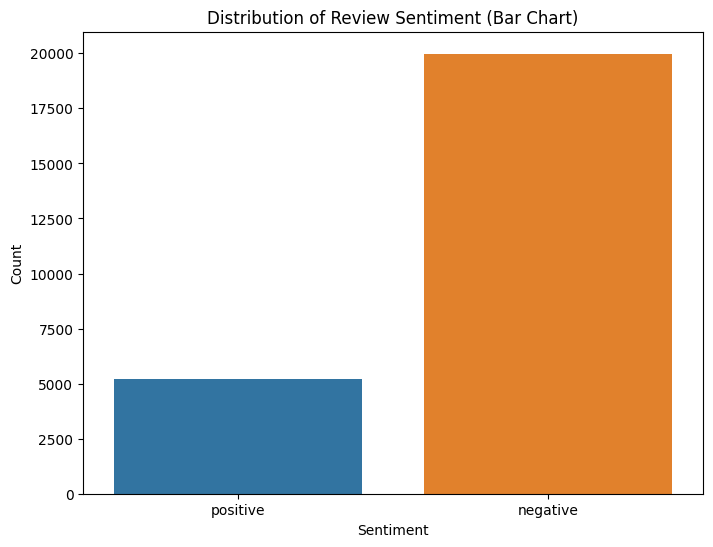

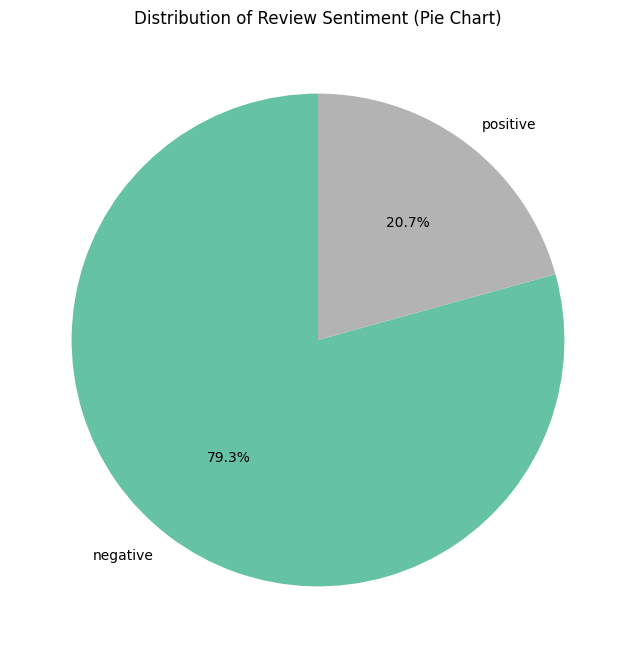

In [48]:

plt.figure(figsize=(8, 6))
sns.countplot(x='review_sentiment', data=df)
plt.title('Distribution of Review Sentiment (Bar Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sentiment_counts = df['review_sentiment'].value_counts()
plt.figure(figsize=(8, 8))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Review Sentiment (Pie Chart)')
plt.ylabel('')
plt.show()

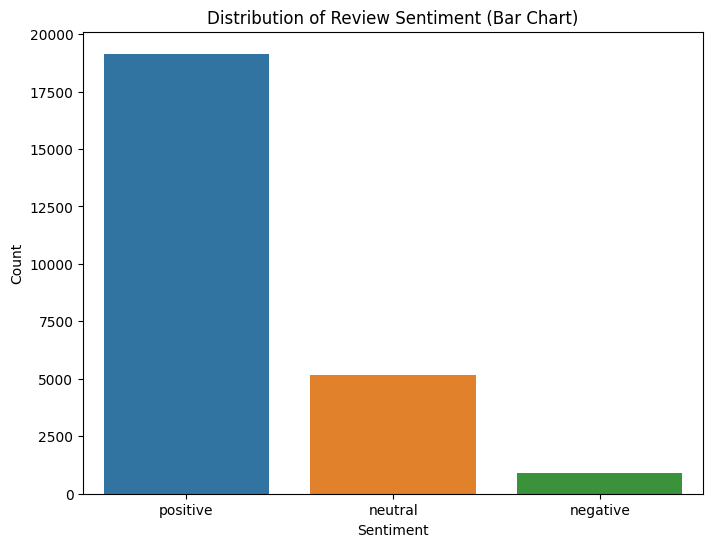

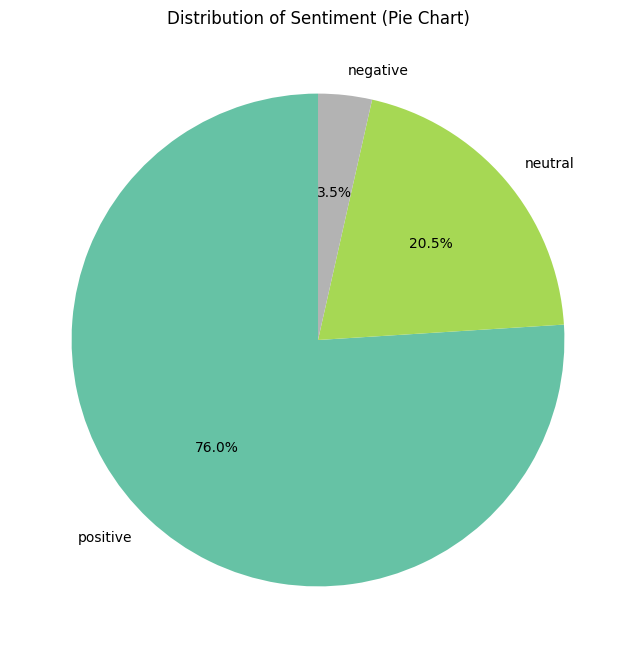

In [111]:

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Review Sentiment (Bar Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Sentiment (Pie Chart)')
plt.ylabel('')
plt.show()

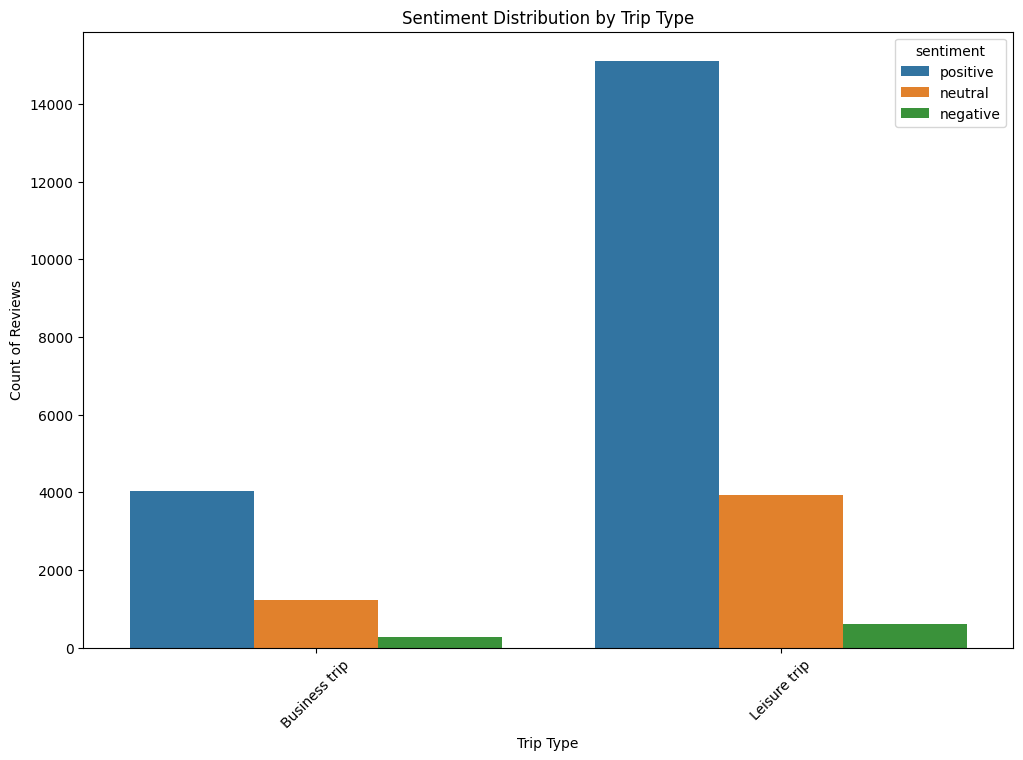

In [50]:

plt.figure(figsize=(12, 8))
sns.countplot(x='trip_type', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)  
plt.show()

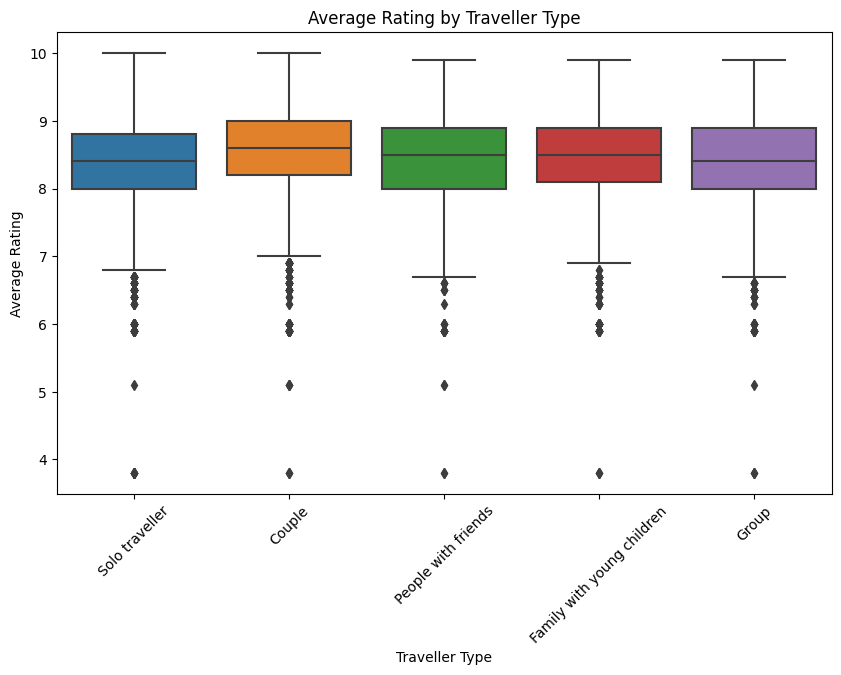

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='traveller_type', y='avg_rating', data=df)
plt.title('Average Rating by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

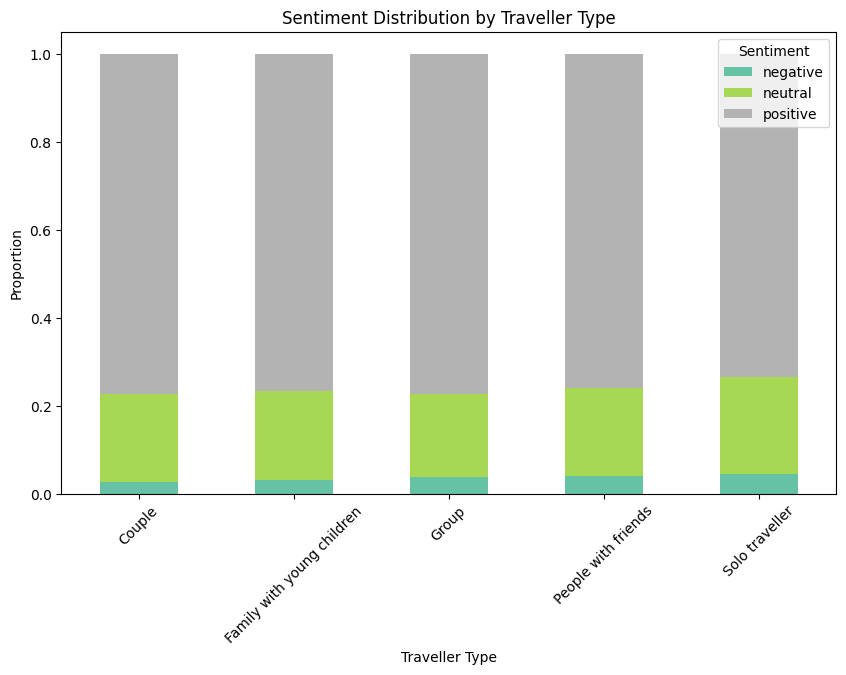

In [52]:

sentiment_by_travelertype = df.groupby('traveller_type')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

sentiment_by_travelertype.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Sentiment Distribution by Traveller Type')
plt.ylabel('Proportion')
plt.xlabel('Traveller Type')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


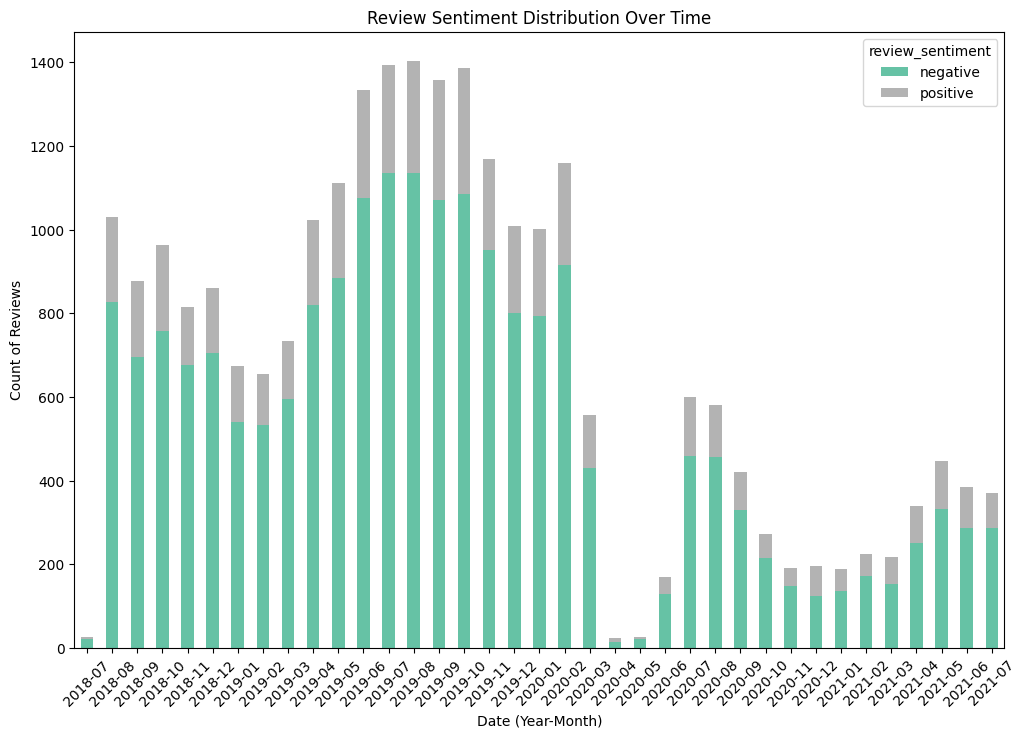

In [53]:
df['reviewed_at'] = pd.to_datetime(df['reviewed_at'])
df['year_month'] = df['reviewed_at'].dt.to_period('M')

sentiment_by_date = df.groupby(['year_month', 'review_sentiment']).size().unstack().fillna(0)
sentiment_by_date.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')
plt.title('Review Sentiment Distribution Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

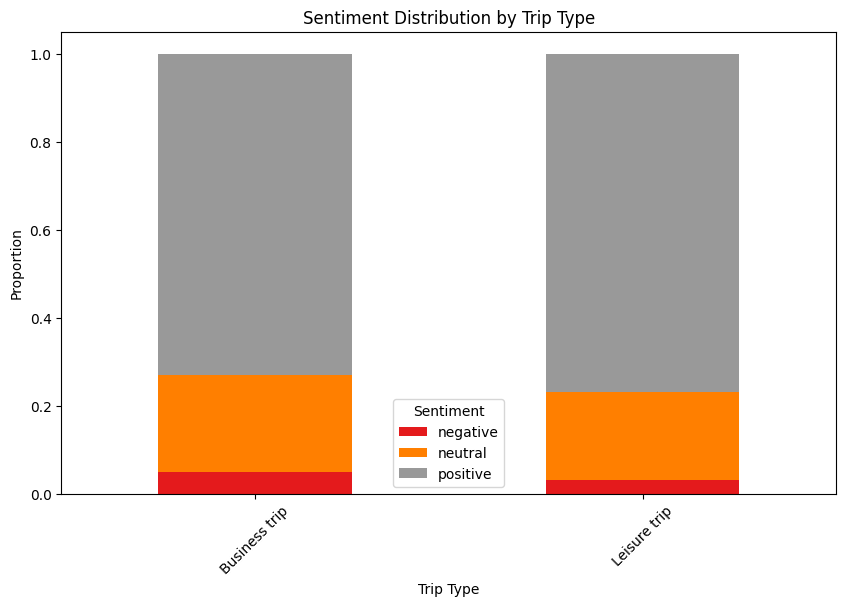

In [54]:

sentiment_by_triptype = df.groupby('trip_type')['sentiment'].value_counts(normalize=True).unstack().fillna(0)


sentiment_by_triptype.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title('Sentiment Distribution by Trip Type')
plt.ylabel('Proportion')
plt.xlabel('Trip Type')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


In [55]:
import pandas as pd


def categorize_stay_duration(duration):
    if duration <= 10:
        return 'Short'
    elif 11 <= duration <= 20:
        return 'Medium'
    elif 21 <= duration <= 30:
        return 'Long'
    else:
        return 'Very Long'

df['stay_duration_category'] = df['stay_duration'].apply(categorize_stay_duration)

print(df[['stay_duration', 'stay_duration_category']].head())


   stay_duration stay_duration_category
0              1                  Short
1              1                  Short
2              6                  Short
3              4                  Short
4              4                  Short


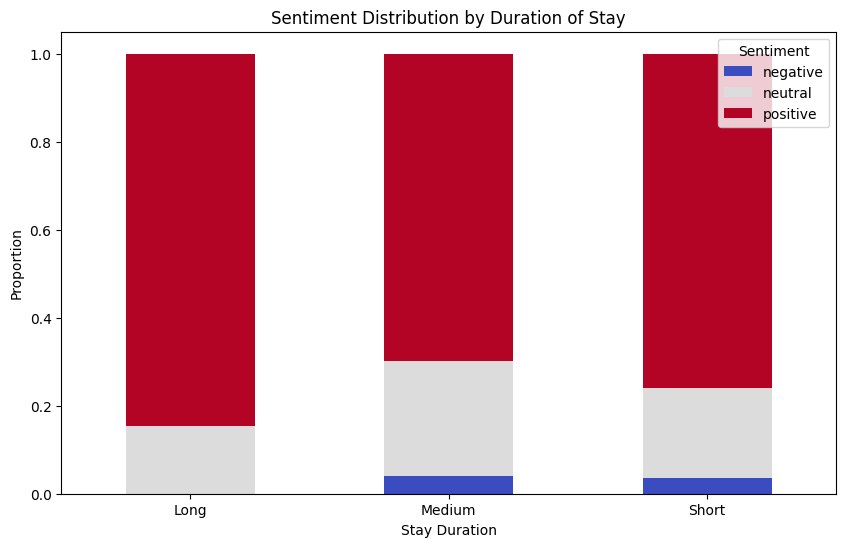

In [56]:

sentiment_by_stay_duration = df.groupby('stay_duration_category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

sentiment_by_stay_duration.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Sentiment Distribution by Duration of Stay')
plt.ylabel('Proportion')
plt.xlabel('Stay Duration')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


In [57]:

sentiment_by_nationality = df.groupby('nationality')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

print(sentiment_by_nationality)


sentiment           negative   neutral  positive
nationality                                     
Abkhazia, ​Georgia  0.000000  0.333333  0.666667
Afghanistan         1.000000  0.000000  0.000000
Albania             0.020408  0.122449  0.857143
Algeria             0.000000  1.000000  0.000000
Angola              0.000000  1.000000  0.000000
...                      ...       ...       ...
Venezuela           0.000000  0.000000  1.000000
Vietnam             0.066667  0.200000  0.733333
Yemen               0.000000  0.000000  1.000000
Zambia              0.000000  0.250000  0.750000
Zimbabwe            0.000000  0.000000  1.000000

[160 rows x 3 columns]


In [58]:
!pip install nltk


In [59]:
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

custom_stopwords = {"review", "comments", "available"}  removed
all_stopwords = stop_words.union(custom_stopwords)  # Combine with existing stopwords

# Function to remove stopwords and custom words
def remove_stopwords(text):
    # Remove stopwords and custom words
    text = ' '.join([word for word in text.split() if word not in all_stopwords])
    return text

# Apply the cleaning and stopword removal to the 'review_text' column
df['cleaned_review'] = df['review_text'].apply(remove_stopwords)

# Display the cleaned reviews
print(df['cleaned_review'].head())


0           everything perfect! quite cozy place relax
1                     friendly host perfect breakfast!
2    wanted week beach winter location fab apartmen...
3    stay house experiencing bliss luxury house she...
4    building musty smell hallway despite built 198...
Name: cleaned_review, dtype: object


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


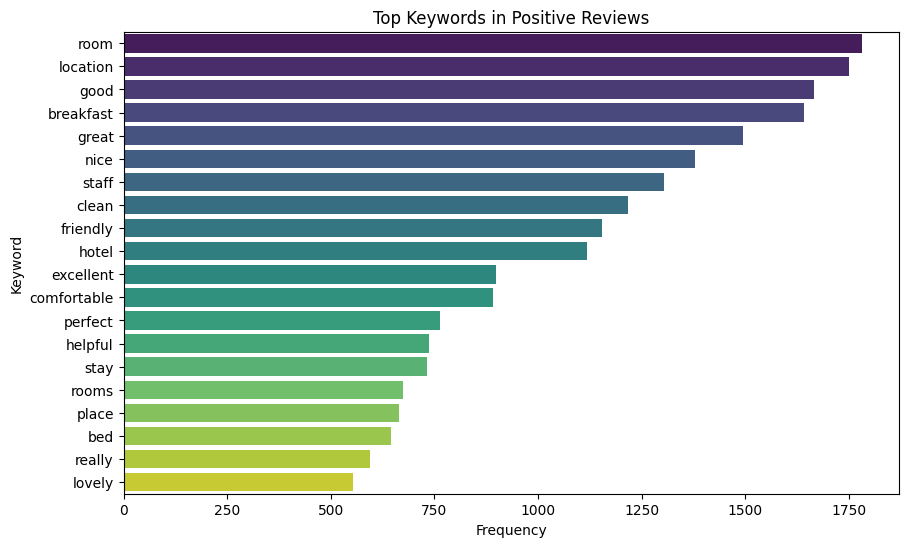

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Separate positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# TF-IDF Vectorization for Positive Reviews
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
positive_tfidf = vectorizer.fit_transform(positive_reviews)
positive_keywords = vectorizer.get_feature_names_out()
positive_word_freq = positive_tfidf.sum(axis=0).A1

# Plot top keywords in positive reviews
positive_freq_df = pd.DataFrame(zip(positive_keywords, positive_word_freq), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=positive_freq_df, palette='viridis')
plt.title('Top Keywords in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

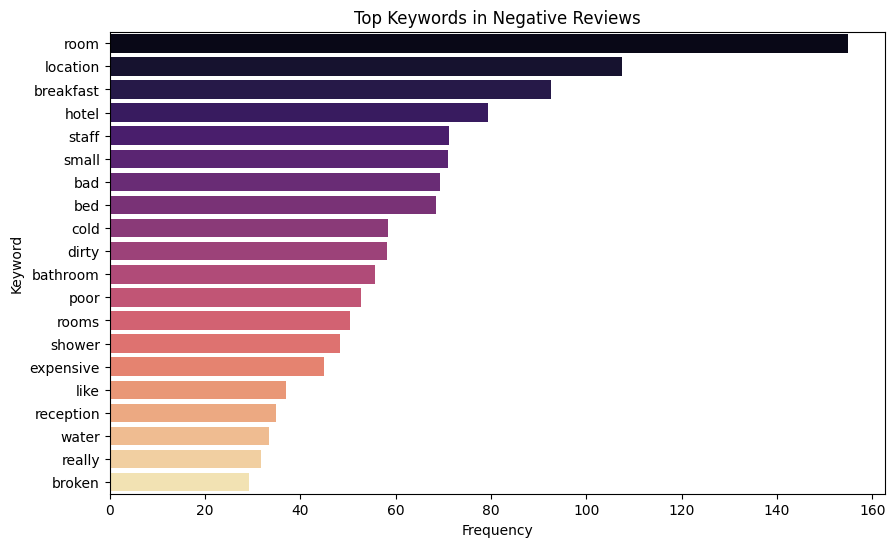

In [61]:
# Separate negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# TF-IDF Vectorization for Negative Reviews
negative_tfidf = vectorizer.fit_transform(negative_reviews)
negative_keywords = vectorizer.get_feature_names_out()
negative_word_freq = negative_tfidf.sum(axis=0).A1

# Plot top keywords in negative reviews
negative_freq_df = pd.DataFrame(zip(negative_keywords, negative_word_freq), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=negative_freq_df, palette='magma')
plt.title('Top Keywords in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

In [62]:
df


,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,trip_type,traveller_type,room_type,stay_duration,review_sentiment,sentiment,year_month,stay_duration_category,cleaned_review
0,Exceptional,2021-07-11,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,everything was perfect! quite cozy place to relax,Business trip,Solo traveller,Junior Suite,1,positive,positive,2021-07,Short,everything perfect! quite cozy place relax
1,I highly recommend this b&b! We enjoyed it a lot!,2019-11-24,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,very friendly host and perfect breakfast!,Leisure trip,Couple,Deluxe Suite,1,positive,positive,2019-11,Short,friendly host perfect breakfast!
2,Exceptional,2020-01-03,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,it was just what we wanted for a week by the b...,Leisure trip,Couple,Apartment with Sea View,6,negative,neutral,2020-01,Short,wanted week beach winter location fab apartmen...
3,My stay in the house was a experiencing bliss ...,2019-09-08,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,my stay in the house was a experiencing bliss ...,Business trip,Solo traveller,Junior Suite,4,positive,positive,2019-09,Short,stay house experiencing bliss luxury house she...
4,One bedroom apartment with wonderful view and ...,2019-06-23,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,the building itself has a very musty smell in ...,Leisure trip,People with friends,Apartment with Sea View,4,negative,positive,2019-06,Short,building musty smell hallway despite built 198...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,2019-07-03,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,had a room with the view to the main street ju...,Business trip,Solo traveller,Double or Twin Room,3,negative,positive,2019-07,Short,room view main street front train station anno...
26671,Exceptional,2018-12-07,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,there was nothing not to like \n\neverything w...,Leisure trip,Family with young children,Tent,3,negative,positive,2018-12,Short,nothing like everything excellent
26672,Good,2018-09-15,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,poor internet connection and aircon in room no...,Leisure trip,Couple,Standard Double or Twin Room,2,negative,positive,2018-09,Short,poor internet connection aircon room working e...
26673,Very good,2019-08-02,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,there are no comments available for this review,Leisure trip,Couple,Basic Double Room,1,negative,positive,2019-08,Short,


In [65]:
df

,review_title,reviewed_at,reviewed_by,hotel_name,avg_rating,nationality,rating,review_text,trip_type,traveller_type,room_type,stay_duration,review_sentiment,sentiment,year_month,stay_duration_category,cleaned_review
0,Exceptional,2021-07-11,Kyrylo,Villa Pura Vida,9.7,Poland,10.0,everything was perfect! quite cozy place to relax,Business trip,Solo traveller,Junior Suite,1,positive,positive,2021-07,Short,everything perfect! quite cozy place relax
1,I highly recommend this b&b! We enjoyed it a lot!,2019-11-24,Dimitri,Villa Pura Vida,9.7,Belgium,9.0,very friendly host and perfect breakfast!,Leisure trip,Couple,Deluxe Suite,1,positive,positive,2019-11,Short,friendly host perfect breakfast!
2,Exceptional,2020-01-03,Virginia,Hydro Palace Apartment,9.2,United Kingdom,10.0,it was just what we wanted for a week by the b...,Leisure trip,Couple,Apartment with Sea View,6,negative,neutral,2020-01,Short,wanted week beach winter location fab apartmen...
3,My stay in the house was a experiencing bliss ...,2019-09-08,Kannan,Villa Pura Vida,9.7,Netherlands,10.0,my stay in the house was a experiencing bliss ...,Business trip,Solo traveller,Junior Suite,4,positive,positive,2019-09,Short,stay house experiencing bliss luxury house she...
4,One bedroom apartment with wonderful view and ...,2019-06-23,Sue,Hydro Palace Apartment,9.2,South Africa,9.2,the building itself has a very musty smell in ...,Leisure trip,People with friends,Apartment with Sea View,4,negative,positive,2019-06,Short,building musty smell hallway despite built 198...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26670,Good stay,2019-07-03,Dragos,Hotel Euro Capital Brussels,7.7,Romania,8.8,had a room with the view to the main street ju...,Business trip,Solo traveller,Double or Twin Room,3,negative,positive,2019-07,Short,room view main street front train station anno...
26671,Exceptional,2018-12-07,Anonymous,Glamping op het Zeugekot,8.6,United Kingdom,10.0,there was nothing not to like \n\neverything w...,Leisure trip,Family with young children,Tent,3,negative,positive,2018-12,Short,nothing like everything excellent
26672,Good,2018-09-15,Zhl,NH Brussels Carrefour de L’Europe,7.8,Malaysia,7.9,poor internet connection and aircon in room no...,Leisure trip,Couple,Standard Double or Twin Room,2,negative,positive,2018-09,Short,poor internet connection aircon room working e...
26673,Very good,2019-08-02,Bruno,Hotel Bilderdijk,9.0,Belgium,8.3,there are no comments available for this review,Leisure trip,Couple,Basic Double Room,1,negative,positive,2019-08,Short,


Top 4 words for each topic:

Topic 0:
['location', 'expensive', 'room', 'small']

Topic 1:
['room', 'heater', 'good', 'bathroom']

Topic 2:
['hotel', 'location', 'small', 'room']

Topic 3:
['location', 'dark', 'dirty', 'clean']

Topic 4:
['room', 'uncomfortable', 'location', 'beds']

Topic 5:
['hotel', 'room', 'elevator', 'wifi']

Topic 6:
['room', 'slow', 'staff', 'day']

Topic 7:
['area', 'bed', 'poor', 'room']

Topic 8:
['things', 'bad', 'broken', 'spacious']

Topic 9:
['like', 'room', 'bad', 'hotel']

Topic 10:
['staff', 'bad', 'air', 'room']

Topic 11:
['run', 'bad', 'breakfast', 'safe']

Topic 12:
['bar', 'difficult', 'bed', 'bedroom']

Topic 13:
['location', 'room', 'center', 'wifi']

Topic 14:
['location', 'poor', 'breakfast', 'bad']

Topic 15:
['bad', 'small', 'location', 'rooms']

Topic 16:
['airport', 'small', 'breakfast', 'room']

Topic 17:
['hotel', 'staff', 'breakfast', 'room']

Topic 18:
['lighting', 'room', 'late', 'check']

Topic 19:
['staff', 'room', 'bed', 'comfortab

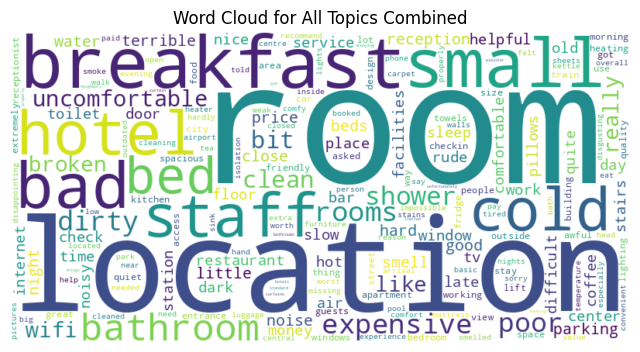

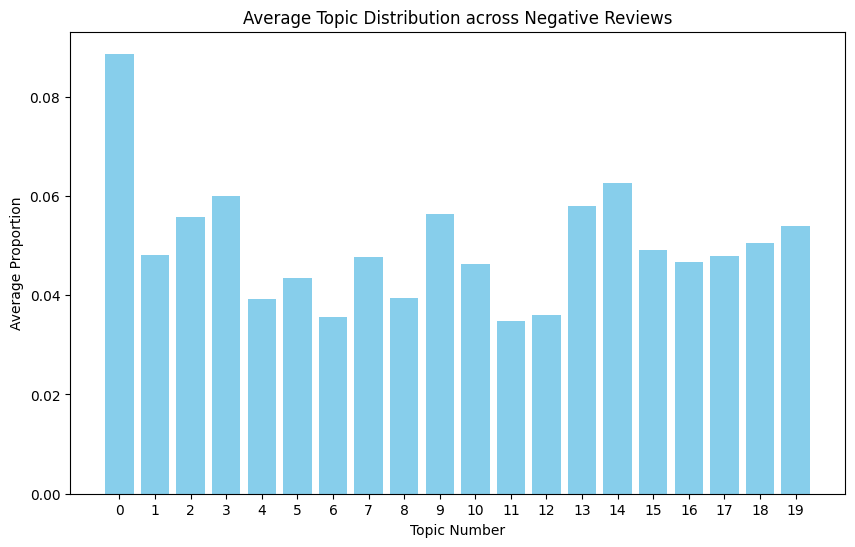

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features

# 1. Split the reviews based on sentiment
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Fit and transform the cleaned reviews
X_tfidf = tfidf_vectorizer.fit_transform(negative_reviews)

# Initialize and fit LDA model with 20 topics
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X_tfidf)

# Initialize an empty list to collect all top words from all topics
all_top_words_neg = []

# Display the top 4 words for each topic and collect them
print("Top 4 words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx}:")
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-4:]]  # Get top 4 words
    print(top_words)
    
    # Append the top words for this topic to the all_top_words list
    all_top_words_neg.extend(top_words)

# Convert to a set to remove duplicates, if necessary
all_top_words_neg = list(set(all_top_words_neg))

# Optionally, you can print or check the array of all words
print("\nAll top words from all topics:")
print(all_top_words_neg)

# Step 2: Aggregate word frequencies for all topics
word_freq = {}

for topic_idx, topic in enumerate(lda.components_):
    # For each topic, map words to their frequencies
    for i, word in enumerate(tfidf_vectorizer.get_feature_names_out()):
        # Accumulate the frequency for each word across topics
        word_freq[word] = word_freq.get(word, 0) + topic[i]

# Step 3: Generate word cloud for all topics combined
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Step 4: Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Topics Combined")
plt.show()

# Step 5: Get the topic distribution for each document
topic_distribution = lda.transform(X_tfidf)  # This gives the topic distribution for each document

# Step 6: Plot topic distribution (optional: you can aggregate the distribution or plot per document)
average_topic_distribution = np.mean(topic_distribution, axis=0)

# Plot the topic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(lda.n_components), average_topic_distribution, color='skyblue')
plt.title('Average Topic Distribution across Negative Reviews')
plt.xlabel('Topic Number')
plt.ylabel('Average Proportion')
plt.xticks(range(lda.n_components))
plt.show()


Top words for each topic:

Topic 0:
['cottage', 'super', 'top', 'alles']

Topic 1:
['service', 'money', 'good', 'value']

Topic 2:
['room', 'location', 'everything', 'perfect']

Topic 3:
['breakfast', 'location', 'room', 'love']

Topic 4:
['great', 'none', 'breakfast', 'ok']

Topic 5:
['clean', 'great', 'hotel', 'location']

Topic 6:
['breakfast', 'hotel', 'us', 'room']

Topic 7:
['room', 'location', 'breakfast', 'nice']

Topic 8:
['pillows', 'good', 'room', 'breakfast']

Topic 9:
['staff', 'swimming', 'breakfast', 'pool']

Topic 10:
['location', 'hotel', 'room', 'good']

Topic 11:
['great', 'location', 'breakfast', 'room']

Topic 12:
['breakfast', 'nice', 'good', 'room']

Topic 13:
['everthing', 'menin', 'gate', 'hostess']

Topic 14:
['hotel', 'nice', 'breakfast', 'room']

Topic 15:
['good', 'location', 'special', 'na']

Topic 16:
['nice', 'location', 'good', 'room']

Topic 17:
['friendly', 'great', 'staff', 'location']

Topic 18:
['clean', 'location', 'room', 'good']

Topic 19:
['alw

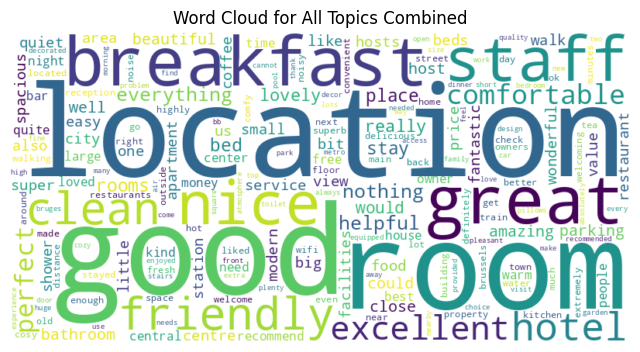

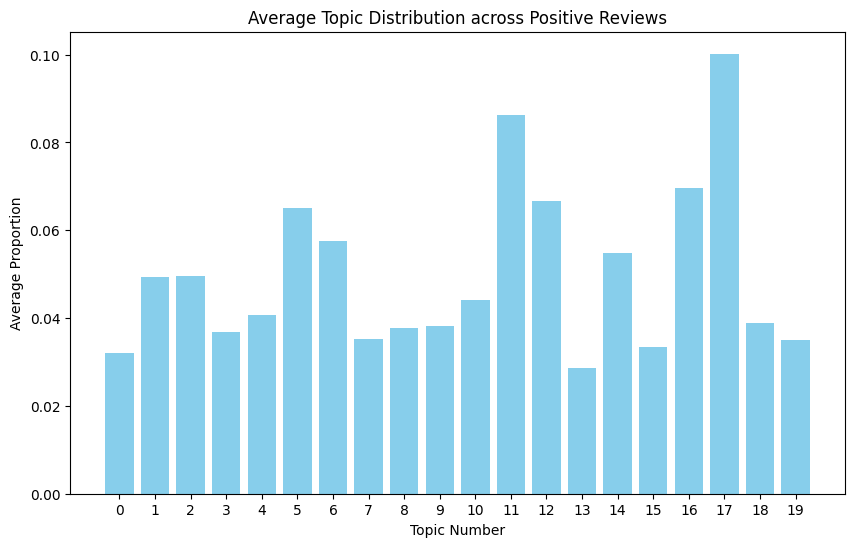

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features

# 1. Split the reviews based on sentiment
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# Fit and transform the cleaned reviews
X_tfidf = tfidf_vectorizer.fit_transform(positive_reviews)

# Initialize and fit LDA model with 20 topics
lda = LatentDirichletAllocation(n_components=20, random_state=42)
lda.fit(X_tfidf)

# Initialize an empty list to collect all top words from all topics
all_top_words_pos = []

# Display the top 4 words for each topic and collect them
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx}:")
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-4:]]  # Top 4 words
    print(top_words)
    
    # Append the top words for this topic to the all_top_words list
    all_top_words_pos.extend(top_words)

# Convert to a set to remove duplicates, if necessary
all_top_words_pos = list(set(all_top_words_pos))

# Optionally, you can print or check the array of all words
print("\nAll top words from all topics:")
print(all_top_words_pos)

# Step 2: Aggregate word frequencies for all topics
word_freq = {}

for topic_idx, topic in enumerate(lda.components_):
    # For each topic, map words to their frequencies
    for i, word in enumerate(tfidf_vectorizer.get_feature_names_out()):
        # Accumulate the frequency for each word across topics
        word_freq[word] = word_freq.get(word, 0) + topic[i]

# Step 3: Generate word cloud for all topics combined
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Step 4: Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Topics Combined")
plt.show()

# Step 5: Topic Distribution
topic_distribution = lda.transform(X_tfidf)

# Step 6: Plot average topic distribution
average_topic_distribution = np.mean(topic_distribution, axis=0)

# Plot the topic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(lda.n_components), average_topic_distribution, color='skyblue')
plt.title('Average Topic Distribution across Positive Reviews')
plt.xlabel('Topic Number')
plt.ylabel('Average Proportion')
plt.xticks(range(lda.n_components))
plt.show()


In [126]:
# Step 1: Extract dominant topic for each document for negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Transform the cleaned negative reviews using the existing TF-IDF vectorizer
X_tfidf_neg = tfidf_vectorizer.transform(negative_reviews)

# Fit LDA for negative reviews with 10 topics
lda_neg = LatentDirichletAllocation(n_components=20, random_state=42)
negative_topic_distribution = lda_neg.fit_transform(X_tfidf_neg)

# Extract dominant topic for each review
dominant_topics_neg = np.argmax(negative_topic_distribution, axis=1)

# Add dominant topics for negative reviews back to the dataframe
df.loc[df['sentiment'] == 'negative', 'dominant_topic'] = dominant_topics_neg

# Step 2: Extract dominant topic for each document for positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# Transform the cleaned positive reviews using the existing TF-IDF vectorizer
X_tfidf_pos = tfidf_vectorizer.transform(positive_reviews)

# Fit LDA for positive reviews with 20 topics
lda_pos = LatentDirichletAllocation(n_components=20, random_state=42)
positive_topic_distribution = lda_pos.fit_transform(X_tfidf_pos)

# Extract dominant topic for each review
dominant_topics_pos = np.argmax(positive_topic_distribution, axis=1)

# Add dominant topics for positive reviews back to the dataframe
df.loc[df['sentiment'] == 'positive', 'dominant_topic'] = dominant_topics_pos

# Step 3: Handle NaN or infinite values in 'dominant_topic' column
# Replace NaN or missing values with -1
df['dominant_topic'] = df['dominant_topic'].fillna(-1).astype(int)

# Final: Verify the updated dataframe
print(df[['cleaned_review', 'sentiment', 'dominant_topic']].head())


                                                                                                                                                                                                                                                                                                                                                                                                                                     cleaned_review  \
0                                                                                                                                                                                                                                                                                                                                                                                                        everything perfect! quite cozy place relax   
1                                                                                                                         

In [125]:
positive_feedbacks = {
   0: "The cottage was super comfortable, and everything was top-notch.",
    1: "The service was excellent, and the stay offered good value for money.",
    2: "The location was perfect, and the room had everything we needed.",
    3: "I loved the breakfast, and the location made our trip even better.",
    4: "The breakfast was okay, but nothing else stood out.",
    5: "The hotel was very clean and located in a great spot.",
    6: "The hotel room was comfortable, and the breakfast set us up for the day.",
    7: "The room was nice, and the breakfast was good.",
    8: "The pillows were soft, and the breakfast was satisfying.",
    9: "The staff were friendly, and the swimming pool was amazing.",
    10: "The hotel had a good room and a fantastic location.",
    11: "The location was great, and the breakfast was excellent.",
    12: "Breakfast was nice, and the room was clean and good.",
    13: "The hostess was welcoming, and the Menin Gate view was perfect.",
    14: "The hotel was nice, and the breakfast had plenty of options.",
    15: "The location was good, but nothing particularly special stood out.",
    16: "The location was nice, and the room was comfortable.",
    17: "The staff were very friendly, and the location was ideal.",
    18: "The room was clean, and the location was convenient for travelers.",
    19: "The location was always great, and the room was consistently good."
}

negative_feedbacks = {
    0: "The location of the hotel was expensive, and the room was very small.",
    1: "The room had a good heater but the bathroom was not great.",
    2: "The hotel had a great location, but the room was small.",
    3: "The location was dark and dirty, although some parts were clean.",
    4: "The room was uncomfortable, and the beds did not help despite the good location.",
    5: "The hotel room lacked proper elevator access and had no stable wifi connection.",
    6: "The room service was slow, and the staff took an entire day to respond.",
    7: "The area was poor, and the bed in the room was uncomfortable.",
    8: "Many things in the room were broken, and the space was not as bad as expected.",
    9: "I did not like the room; the hotel experience was bad overall.",
    10: "The staff was unhelpful, the air quality in the room was bad.",
    11: "The place seemed run-down, with bad breakfast options but a relatively safe environment.",
    12: "The bar was difficult to access, and the bed in the bedroom was uncomfortable.",
    13: "The location was good, but the room was far from the center and had no wifi.",
    14: "The location was poor, and the breakfast offered was bad.",
    15: "The rooms were small and in bad condition despite the location being acceptable.",
    16: "The hotel was near the airport but offered a small breakfast and cramped rooms.",
    17: "The hotel staff was kind, but the breakfast and room quality needed improvement.",
    18: "The room lighting was inadequate, and the check-in process was late.",
    19: "The staff was friendly, and the room was comfortable with a good bed."
}


In [127]:
# Assuming 'df' is your original DataFrame
# Replace 'sentiment' and 'dominant_topic' with the actual column names in your dataset

# Filter the rows where sentiment is positive
df_positive = df[df['sentiment'] == 'positive']

# Define a function to get the top 2 dominant topics for each hotel
def get_top_2_topics(group):
    # Count the frequency of each topic in the group
    topic_counts = group['dominant_topic'].value_counts().head(2)
    # Return the top 2 topics as a series with NaN for missing topics
    return pd.Series({
        'dominant_topic_1': topic_counts.index[0] if len(topic_counts) > 0 else None,
        'dominant_topic_2': topic_counts.index[1] if len(topic_counts) > 1 else None
    })

# Group by hotel name and apply the function to get the top 2 topics
df_grouped_positive = df_positive.groupby('hotel_name').apply(get_top_2_topics).reset_index()

df_grouped_positive['dominant_topic_1'] = df_grouped_positive['dominant_topic_1'].astype('Int64')  # Int64 allows for NaN values
df_grouped_positive['dominant_topic_2'] = df_grouped_positive['dominant_topic_2'].astype('Int64')  # Int64 allows for NaN values



# Display the result
df_grouped_positive

/tmp/ipykernel_36/421984999.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_positive = df_positive.groupby('hotel_name').apply(get_top_2_topics).reset_index()


,hotel_name,dominant_topic_1,dominant_topic_2
0,""" Chimay B & B """,0,7
1,"""En Aqualye"" chambre privative chez l'habitant",0,17
2,"""Ter Ename n°2""",0,10
3,'S Hertogenmolens Hotel,4,6
4,'t Eenvoud,2,7
...,...,...,...
808,pentahotel Leuven,0,18
809,studio cosy,7,0
810,villa 2be,0,7
811,Фальварак KUPALA,0,13


In [128]:
# Ensure you have the correct dataframe 'df_grouped_positive'

# Updated map_feedback function
def map_feedback(row):
    # Get the feedback for dominant topics, use empty string if topic doesn't exist
    feedback_1 = positive_feedbacks.get(row['dominant_topic_1'], "No feedback available for topic 1")
    feedback_2 = positive_feedbacks.get(row['dominant_topic_2'], "No feedback available for topic 2")
    
    # Concatenate the feedbacks
    return feedback_1 + " " + feedback_2

# Create the new 'positive_feedback' column by applying the function
df_grouped_positive['positive_feedback'] = df_grouped_positive.apply(map_feedback, axis=1)

# Display the result with relevant columns
df_grouped_positive[['hotel_name', 'dominant_topic_1', 'dominant_topic_2', 'positive_feedback']]


,hotel_name,dominant_topic_1,dominant_topic_2,positive_feedback
0,""" Chimay B & B """,0,7,"The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good."
1,"""En Aqualye"" chambre privative chez l'habitant",0,17,"The cottage was super comfortable, and everything was top-notch. The staff were very friendly, and the location was ideal."
2,"""Ter Ename n°2""",0,10,"The cottage was super comfortable, and everything was top-notch. The hotel had a good room and a fantastic location."
3,'S Hertogenmolens Hotel,4,6,"The breakfast was okay, but nothing else stood out. The hotel room was comfortable, and the breakfast set us up for the day."
4,'t Eenvoud,2,7,"The location was perfect, and the room had everything we needed. The room was nice, and the breakfast was good."
...,...,...,...,...
808,pentahotel Leuven,0,18,"The cottage was super comfortable, and everything was top-notch. The room was clean, and the location was convenient for travelers."
809,studio cosy,7,0,"The room was nice, and the breakfast was good. The cottage was super comfortable, and everything was top-notch."
810,villa 2be,0,7,"The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good."
811,Фальварак KUPALA,0,13,"The cottage was super comfortable, and everything was top-notch. The hostess was welcoming, and the Menin Gate view was perfect."


In [129]:
# Assuming 'df' is your original DataFrame
# Replace 'sentiment' and 'dominant_topic' with the actual column names in your dataset

# Filter the rows where sentiment is positive
df_negative = df[df['sentiment'] == 'negative']

# Define a function to get the top 2 dominant topics for each hotel
def get_top_2_topics(group):
    # Count the frequency of each topic in the group
    topic_counts_negative = group['dominant_topic'].value_counts().head(2)
    
    # Return the top 2 topics as a series with NaN for missing topics
    return pd.Series({
        'dominant_topic_1': topic_counts_negative.index[0] if len(topic_counts_negative) > 0 else None,
        'dominant_topic_2': topic_counts_negative.index[1] if len(topic_counts_negative) > 1 else None
    })

# Group by hotel name and apply the function to get the top 2 topics
df_grouped_negative= df_negative.groupby('hotel_name').apply(get_top_2_topics).reset_index()
df_grouped_negative['dominant_topic_1'] = df_grouped_negative['dominant_topic_1'].astype('Int64')  # Int64 allows for NaN values
df_grouped_negative['dominant_topic_2'] = df_grouped_negative['dominant_topic_2'].astype('Int64')  # Int64 allows for NaN values

# Display the result
df_grouped_negative

/tmp/ipykernel_36/1424431041.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_negative= df_negative.groupby('hotel_name').apply(get_top_2_topics).reset_index()


,hotel_name,dominant_topic_1,dominant_topic_2
0,""" Chimay B & B """,18,<NA>
1,'S Hertogenmolens Hotel,7,<NA>
2,Acropolis,9,<NA>
3,Adagio access Brussels Delta,16,<NA>
4,Afspanning De Kroon,10,<NA>
...,...,...,...
243,ibis Hotel Brussels Airport,16,9
244,ibis Liège Centre Opéra,10,11
245,ibis budget Antwerpen Port,13,15
246,nhow Brussels Bloom,0,12


In [130]:
# Ensure you have the correct dataframe 'df_grouped_positive'

# Updated map_feedback function
def map_feedback(row):
    # Get the feedback for dominant topics, use empty string if topic doesn't exist
    feedback_1 = negative_feedbacks.get(row['dominant_topic_1'], "No feedback available for topic 1")
    feedback_2 = negative_feedbacks.get(row['dominant_topic_2'], "No feedback available for topic 2")
    
    # Concatenate the feedbacks
    return feedback_1 + " " + feedback_2

# Create the new 'positive_feedback' column by applying the function
df_grouped_negative['negative_feedback'] = df_grouped_negative.apply(map_feedback, axis=1)

# Display the result with relevant columns
df_grouped_negative[['hotel_name', 'dominant_topic_1', 'dominant_topic_2', 'negative_feedback']]


,hotel_name,dominant_topic_1,dominant_topic_2,negative_feedback
0,""" Chimay B & B """,18,<NA>,"The room lighting was inadequate, and the check-in process was late. No feedback available for topic 2"
1,'S Hertogenmolens Hotel,7,<NA>,"The area was poor, and the bed in the room was uncomfortable. No feedback available for topic 2"
2,Acropolis,9,<NA>,I did not like the room; the hotel experience was bad overall. No feedback available for topic 2
3,Adagio access Brussels Delta,16,<NA>,The hotel was near the airport but offered a small breakfast and cramped rooms. No feedback available for topic 2
4,Afspanning De Kroon,10,<NA>,"The staff was unhelpful, the air quality in the room was bad. No feedback available for topic 2"
...,...,...,...,...
243,ibis Hotel Brussels Airport,16,9,The hotel was near the airport but offered a small breakfast and cramped rooms. I did not like the room; the hotel experience was bad overall.
244,ibis Liège Centre Opéra,10,11,"The staff was unhelpful, the air quality in the room was bad. The place seemed run-down, with bad breakfast options but a relatively safe environment."
245,ibis budget Antwerpen Port,13,15,"The location was good, but the room was far from the center and had no wifi. The rooms were small and in bad condition despite the location being acceptable."
246,nhow Brussels Bloom,0,12,"The location of the hotel was expensive, and the room was very small. The bar was difficult to access, and the bed in the bedroom was uncomfortable."


In [103]:
df_grouped_positive.drop(['dominant_topic_1', 'dominant_topic_2'], axis=1, inplace=True)

df_grouped_negative.drop(['dominant_topic_1', 'dominant_topic_2'], axis=1, inplace=True)


KeyError: "['dominant_topic_1', 'dominant_topic_2'] not found in axis"

In [122]:
df_grouped_positive

,hotel_name,dominant_topic_1,dominant_topic_2,positive_feedback
0,""" Chimay B & B """,0,17,"The cottage was super comfortable, and everything was top-notch. The staff were very friendly, and the location was ideal."
1,"""En Aqualye"" chambre privative chez l'habitant",0,16,"The cottage was super comfortable, and everything was top-notch. The location was nice, and the room was comfortable."
2,"""Ter Ename n°2""",0,11,"The cottage was super comfortable, and everything was top-notch. The location was great, and the breakfast was excellent."
3,'S Hertogenmolens Hotel,12,17,"Breakfast was nice, and the room was clean and good. The staff were very friendly, and the location was ideal."
4,'t Eenvoud,16,5,"The location was nice, and the room was comfortable. The hotel was very clean and located in a great spot."
...,...,...,...,...
808,pentahotel Leuven,0,11,"The cottage was super comfortable, and everything was top-notch. The location was great, and the breakfast was excellent."
809,studio cosy,17,0,"The staff were very friendly, and the location was ideal. The cottage was super comfortable, and everything was top-notch."
810,villa 2be,12,0,"Breakfast was nice, and the room was clean and good. The cottage was super comfortable, and everything was top-notch."
811,Фальварак KUPALA,0,3,"The cottage was super comfortable, and everything was top-notch. I loved the breakfast, and the location made our trip even better."


In [131]:
import pandas as pd

# Replace NaN values in both feedback columns
df_grouped_positive['positive_feedback'].fillna("Not Available", inplace=True)
df_grouped_negative['negative_feedback'].fillna("Not Available", inplace=True)

# Merge the two DataFrames on 'hotel_name' (outer join to ensure no data loss)
df_combined = pd.merge(df_grouped_positive[['hotel_name', 'positive_feedback']], 
                       df_grouped_negative[['hotel_name', 'negative_feedback']], 
                       on='hotel_name', 
                       how='outer')

# Replace any remaining NaN values with "Not Available"
df_combined.fillna("Not Available", inplace=True)

# Display the resulting DataFrame
df_combined


/tmp/ipykernel_36/969094630.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_grouped_positive['positive_feedback'].fillna("Not Available", inplace=True)
/tmp/ipykernel_36/969094630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

,hotel_name,positive_feedback,negative_feedback
0,""" Chimay B & B ""","The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.","The room lighting was inadequate, and the check-in process was late. No feedback available for topic 2"
1,"""En Aqualye"" chambre privative chez l'habitant","The cottage was super comfortable, and everything was top-notch. The staff were very friendly, and the location was ideal.",Not Available
2,"""Ter Ename n°2""","The cottage was super comfortable, and everything was top-notch. The hotel had a good room and a fantastic location.",Not Available
3,'S Hertogenmolens Hotel,"The breakfast was okay, but nothing else stood out. The hotel room was comfortable, and the breakfast set us up for the day.","The area was poor, and the bed in the room was uncomfortable. No feedback available for topic 2"
4,'t Eenvoud,"The location was perfect, and the room had everything we needed. The room was nice, and the breakfast was good.",Not Available
...,...,...,...
810,pentahotel Leuven,"The cottage was super comfortable, and everything was top-notch. The room was clean, and the location was convenient for travelers.","The location of the hotel was expensive, and the room was very small. The place seemed run-down, with bad breakfast options but a relatively safe environment."
811,studio cosy,"The room was nice, and the breakfast was good. The cottage was super comfortable, and everything was top-notch.",Not Available
812,villa 2be,"The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.",Not Available
813,Фальварак KUPALA,"The cottage was super comfortable, and everything was top-notch. The hostess was welcoming, and the Menin Gate view was perfect.",Not Available


In [132]:
import pandas as pd

# Set pandas display option to show the full text in the DataFrame
pd.set_option('display.max_colwidth', None)

# Assuming df_combined is the DataFrame with the feedbacks
df_combined


,hotel_name,positive_feedback,negative_feedback
0,""" Chimay B & B ""","The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.","The room lighting was inadequate, and the check-in process was late. No feedback available for topic 2"
1,"""En Aqualye"" chambre privative chez l'habitant","The cottage was super comfortable, and everything was top-notch. The staff were very friendly, and the location was ideal.",Not Available
2,"""Ter Ename n°2""","The cottage was super comfortable, and everything was top-notch. The hotel had a good room and a fantastic location.",Not Available
3,'S Hertogenmolens Hotel,"The breakfast was okay, but nothing else stood out. The hotel room was comfortable, and the breakfast set us up for the day.","The area was poor, and the bed in the room was uncomfortable. No feedback available for topic 2"
4,'t Eenvoud,"The location was perfect, and the room had everything we needed. The room was nice, and the breakfast was good.",Not Available
...,...,...,...
810,pentahotel Leuven,"The cottage was super comfortable, and everything was top-notch. The room was clean, and the location was convenient for travelers.","The location of the hotel was expensive, and the room was very small. The place seemed run-down, with bad breakfast options but a relatively safe environment."
811,studio cosy,"The room was nice, and the breakfast was good. The cottage was super comfortable, and everything was top-notch.",Not Available
812,villa 2be,"The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.",Not Available
813,Фальварак KUPALA,"The cottage was super comfortable, and everything was top-notch. The hostess was welcoming, and the Menin Gate view was perfect.",Not Available


In [136]:
import pandas as pd

# Temporarily display all rows
with pd.option_context('display.max_rows', None):
 df_combined



In [137]:
df_combined

,hotel_name,positive_feedback,negative_feedback
0,""" Chimay B & B ""","The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.","The room lighting was inadequate, and the check-in process was late. No feedback available for topic 2"
1,"""En Aqualye"" chambre privative chez l'habitant","The cottage was super comfortable, and everything was top-notch. The staff were very friendly, and the location was ideal.",Not Available
2,"""Ter Ename n°2""","The cottage was super comfortable, and everything was top-notch. The hotel had a good room and a fantastic location.",Not Available
3,'S Hertogenmolens Hotel,"The breakfast was okay, but nothing else stood out. The hotel room was comfortable, and the breakfast set us up for the day.","The area was poor, and the bed in the room was uncomfortable. No feedback available for topic 2"
4,'t Eenvoud,"The location was perfect, and the room had everything we needed. The room was nice, and the breakfast was good.",Not Available
...,...,...,...
810,pentahotel Leuven,"The cottage was super comfortable, and everything was top-notch. The room was clean, and the location was convenient for travelers.","The location of the hotel was expensive, and the room was very small. The place seemed run-down, with bad breakfast options but a relatively safe environment."
811,studio cosy,"The room was nice, and the breakfast was good. The cottage was super comfortable, and everything was top-notch.",Not Available
812,villa 2be,"The cottage was super comfortable, and everything was top-notch. The room was nice, and the breakfast was good.",Not Available
813,Фальварак KUPALA,"The cottage was super comfortable, and everything was top-notch. The hostess was welcoming, and the Menin Gate view was perfect.",Not Available


In [138]:
df_combined.to_csv('df_combined.csv', index=False)